In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from pyanom.density_ratio_estimation import KLDensityRatioEstimator

## Prepare data

In [26]:
X_normal = np.loadtxt("./data/normal_data.csv", delimiter=",")
X_error = np.loadtxt("./data/error_data.csv", delimiter=",")

print(X_normal.shape)
print(X_error.shape)

(100, 3)
(100, 3)


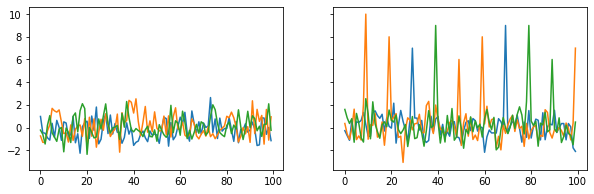

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True)

ax[0].plot(X_normal)
ax[1].plot(X_error)
plt.show()

## Hyper parameter search

In [28]:
kf_iter = KFold(n_splits=3).split(X_normal)

# A rule-of-thumb bandwidth estimator
# <https://en.wikipedia.org/wiki/Kernel_density_estimation>
SILVERMAN = 1.06*np.std(X_normal, axis=0).mean()/pow(len(X_normal), 1/5)

hs = np.arange(SILVERMAN, SILVERMAN+4.0, 0.1)
hs_score = {}
for h in hs:
    losses = []
    for train_index, valid_index in KFold(n_splits=3).split(X_normal):
        train_X_normal = X_normal[train_index]
        valid_X_normal = X_normal[valid_index]
        train_X_error = X_error[train_index]
        valid_X_error = X_error[valid_index]

        model = KLDensityRatioEstimator(
            band_width=h, lr=0.001, max_iter=100000)
        model.fit(train_X_normal, train_X_error)
        losses.append(model.oof_score(
            valid_X_normal, valid_X_error))

    hs_score[h] = np.mean(losses)

min_h = min(hs_score, key=hs_score.get)
print('min h:', min_h)

min h: 2.7946546351203856


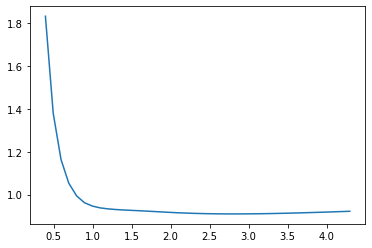

In [29]:
plt.plot(hs_score.keys(), hs_score.values())

## Training

In [30]:
model = KLDensityRatioEstimator(
    band_width=min_h, lr=0.001, max_iter=1000)
model.fit(X_normal, X_error)

KLDensityRatioEstimator(band_width=2.7946546351203856, lr=0.001, max_iter=1000)

## Inference

In [31]:
losses = model.loss_
anomaly_score = model.score(X_error)

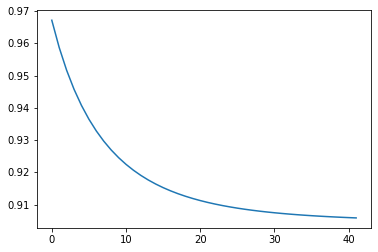

In [32]:
plt.plot(losses)
plt.show()

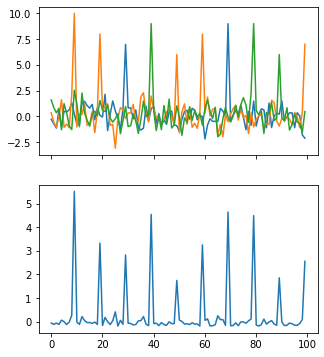

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(5, 6), sharex=True)
ax[0].plot(X_error)
ax[1].plot(anomaly_score)
plt.show()